In [ ]:
# !pip3 install ipympl
# %matplotlib widget

# !pip install pingouin
!pip uninstall scipy -y
!pip uninstall pingouin -y
!pip install pingouin
!pip install scipy --no-cache-dir
!pip uninstall xlrd -y
!pip install xlrd

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 7.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 60.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=f1facb16056451566bd07518bb4626c601b83295534102d9d5b0da5e55425499
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8252499303b2f84366a2843f2c6bfd39229e0534e1e3071ccb7a8d9856c46c83
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.patches as mpatches
from glob import glob
import itertools
import seaborn as sns
import numba as nb
import time
import bisect
import scipy

# from google.colab import output
# output.enable_custom_widget_manager()

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# mount google drive to retrieve files
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Reich Lab'

Mounted at /content/drive
/content/drive/My Drive/Reich Lab


## Attempt 1 to infer deserts only from ancestry BED file

In [ ]:
thefile = "chr-7.thresh-90.length-0.00.gz"
snp_table = pd.read_table(thefile, header=None, usecols=[0,10,14,16], names=["snp_id", "p_nean", "num_nean_alleles", "num_mh_alleles"], skiprows=27)
snp_table["chr"] = snp_table["snp_id"].str[0:1]
snp_table["snp_id"] = snp_table["snp_id"].str[2:].astype(int)
print(snp_table)

NameError: ignored

In [ ]:
chr_length = 159345973
win_size = 10000000

for w in range(0, chr_length, win_size):
  nean_anc = snp_table.loc[(snp_table["p_nean"] > 0.9) & (snp_table["snp_id"].between(w, w + win_size))]
  nean_count = len(nean_anc)
  snp_count = len(snp_table.loc[(snp_table["snp_id"].between(w, w + win_size))])
  window = "{0} - {1}".format(w, w + win_size)
  nean_perc = nean_count / snp_count
  print("Window: {0} \nNeanderthal SNPs: {1} \nTotal SNPs: {2} \nPercent Neanderthal: {3}\n".format(window, nean_count, snp_count, nean_perc))

Window: 0 - 10000000 
Neanderthal SNPs: 0 
Total SNPs: 144106 
Percent Neanderthal: 0.0

Window: 10000000 - 20000000 
Neanderthal SNPs: 0 
Total SNPs: 156502 
Percent Neanderthal: 0.0

Window: 20000000 - 30000000 
Neanderthal SNPs: 0 
Total SNPs: 131495 
Percent Neanderthal: 0.0

Window: 30000000 - 40000000 
Neanderthal SNPs: 0 
Total SNPs: 123721 
Percent Neanderthal: 0.0

Window: 40000000 - 50000000 
Neanderthal SNPs: 0 
Total SNPs: 125487 
Percent Neanderthal: 0.0

Window: 50000000 - 60000000 
Neanderthal SNPs: 0 
Total SNPs: 93350 
Percent Neanderthal: 0.0

Window: 60000000 - 70000000 
Neanderthal SNPs: 0 
Total SNPs: 62271 
Percent Neanderthal: 0.0

Window: 70000000 - 80000000 
Neanderthal SNPs: 0 
Total SNPs: 98221 
Percent Neanderthal: 0.0

Window: 80000000 - 90000000 
Neanderthal SNPs: 0 
Total SNPs: 124695 
Percent Neanderthal: 0.0

Window: 90000000 - 100000000 
Neanderthal SNPs: 0 
Total SNPs: 111451 
Percent Neanderthal: 0.0

Window: 100000000 - 110000000 
Neanderthal SNPs: 

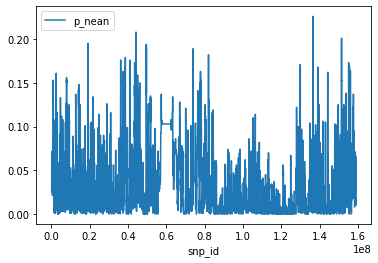

In [ ]:
snp_table.plot("snp_id", "p_nean")

In [ ]:
thefile = "contigs.all"
nean_tile = pd.read_table(thefile, header=None, usecols=[0,1,2], names=["chr", "start", "stop"], dtype=int)
print(nean_tile)

chr7 = nean_tile.loc[nean_tile["chr"]==7]
chr7["color"] = "green"
print(chr7)

      chr     start      stop
0       1   1980170   2062368
1       1   2221273   2243773
2       1   2392700   2753379
3       1   2785882   3110384
4       1   3123757   3456893
...   ...       ...       ...
4432   22  49803108  49825188
4433   22  49850844  49911273
4434   22  49928134  50923386
4435   22  50937043  51051214
4436   22  51052411  51141161

[4437 rows x 3 columns]
      chr      start       stop  color
1883    7     157193     526808  green
1884    7     529292     661192  green
1885    7     667695     964780  green
1886    7     992845    1218730  green
1887    7    1602935    1629188  green
...   ...        ...        ...    ...
2107    7  156818426  157602637  green
2108    7  157661055  157730293  green
2109    7  157789327  157869392  green
2110    7  157888204  158750306  green
2111    7  158858033  158950641  green

[229 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-10000000.0, 169345973.0)

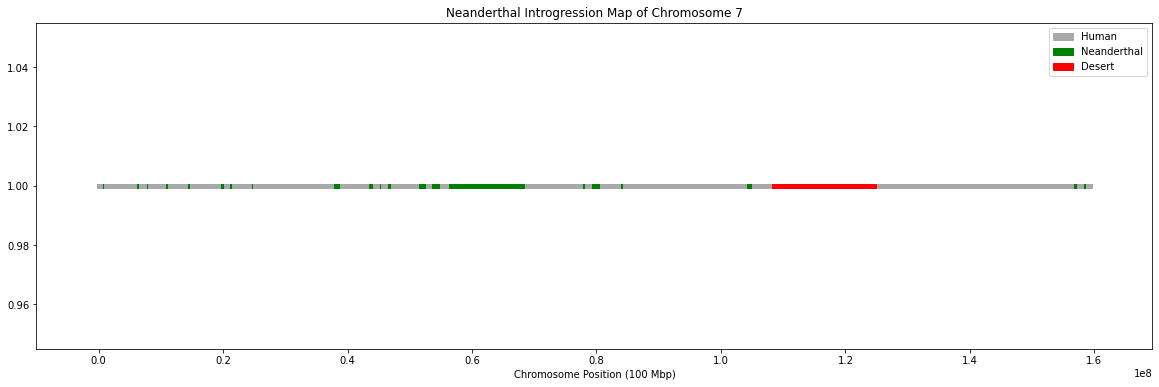

In [ ]:
chr_length = 159345973

start_space = 0

chr7_deserts = pd.DataFrame({"chr": pd.Series(dtype='int'), "start": pd.Series(dtype='int'), "stop": pd.Series(dtype='int'), "color": pd.Series(dtype='str')})

for x_1 , x_2 in zip(chr7["start"].values, chr7["stop"].values):
  if x_1 - start_space > 10000000:
    chr7_deserts = chr7_deserts.append({"chr": 7, "start": start_space + 1, "stop": x_1 - 1, "color": "red"}, ignore_index=True)
  else:
    chr7_deserts = chr7_deserts.append({"chr": 7, "start": start_space + 1, "stop": x_1 - 1, "color": "darkgrey"}, ignore_index=True)
  start_space = x_2

if chr_length - chr7.iloc[-1]["stop"] > 10000000:
  chr7_deserts = chr7_deserts.append({"chr": 7, "start": chr7.iloc[-1]["stop"], "stop": chr_length, "color": "red"}, ignore_index=True)
else:
  chr7_deserts = chr7_deserts.append({"chr": 7, "start": chr7.iloc[-1]["stop"], "stop": chr_length, "color": "darkgrey"}, ignore_index=True)

chr7_complete = chr7.append(chr7_deserts, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(20, 6))

for start, stop, color in zip(chr7_complete["start"].values, chr7_complete["stop"].values, chr7_complete["color"].values):
  ax.plot([start, stop], [1, 1], color=color, lw=5)

plt.title("Neanderthal Introgression Map of Chromosome 7")
ax.set_xlabel("Chromosome Position (100 Mbp)")

red_patch = mpatches.Patch(color='red', label='Desert')
grey_patch = mpatches.Patch(color='darkgrey', label='Human')
green_patch = mpatches.Patch(color='green', label='Neanderthal')
plt.legend(handles=[grey_patch, green_patch, red_patch])

ax.set_xlim(-10000000, chr_length+10000000)

In [ ]:
from pandas.core.common import index_labels_to_array
def map_haplotypes(chrom):
  chr_length = [248956422, 242193529, 198295559, 190214555, 181538259, 	170805979, 159345973, 145138636, 138394717,
              133797422, 135086622, 133275309, 114364328, 107043718, 101991189, 90338345,
              83257441, 80373285, 58617616, 64444167, 46709983, 50818468, 156040895]

  centromeres = [124200000, 93400000, 91700000, 50900000, 47700000, 60500000, 58900000, 45200000, 50600000, 40300000,
                 52900000, 35400000, 16000000, 15600000, 17000000, 38200000, 22200000, 16100000, 28500000, 27100000,
                 12300000, 11800000, 59400000]

  index = chrom - 1

  # get correct chromosome from haplotype file
  chr_hap = nean_tile.loc[nean_tile["chr"]==chrom]
  chr_hap["color"] = "green"

  # obtain chromosome length
  chr_len = chr_length[index]
  centro_loc = centromeres[index]

  # reset chromosome start position
  start_space = 0

  # create dataframe for ancestry deserts
  chr_deserts = pd.DataFrame({"chr": pd.Series(dtype='int'), "start": pd.Series(dtype='int'), "stop": pd.Series(dtype='int'), "color": pd.Series(dtype='str')})

  # go through and determine desert regions and regular human haplotype regions
  for x_1 , x_2 in zip(chr_hap["start"].values, chr_hap["stop"].values):
    if x_1 - start_space > 10000000 and (centro_loc not in range(start_space, x_1)):
      chr_deserts = chr_deserts.append({"chr": chrom, "start": start_space + 1, "stop": x_1 - 1, "color": "red"}, ignore_index=True)
    else:
      chr_deserts = chr_deserts.append({"chr": chrom, "start": start_space + 1, "stop": x_1 - 1, "color": "darkgrey"}, ignore_index=True)
    start_space = x_2

  # deal with the same but in end of chromosome
  if chr_len - chr_hap.iloc[-1]["stop"] > 10000000:
    chr_deserts = chr_deserts.append({"chr": chrom, "start": chr_hap.iloc[-1, 1], "stop": chr_len, "color": "red"}, ignore_index=True)
  else:
    chr_deserts = chr_deserts.append({"chr": chrom, "start": chr_hap.iloc[-1, 1], "stop": chr_len, "color": "darkgrey"}, ignore_index=True)

  return pd.concat([chr_hap, chr_deserts], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Empty DataFrame
Columns: []
Index: []


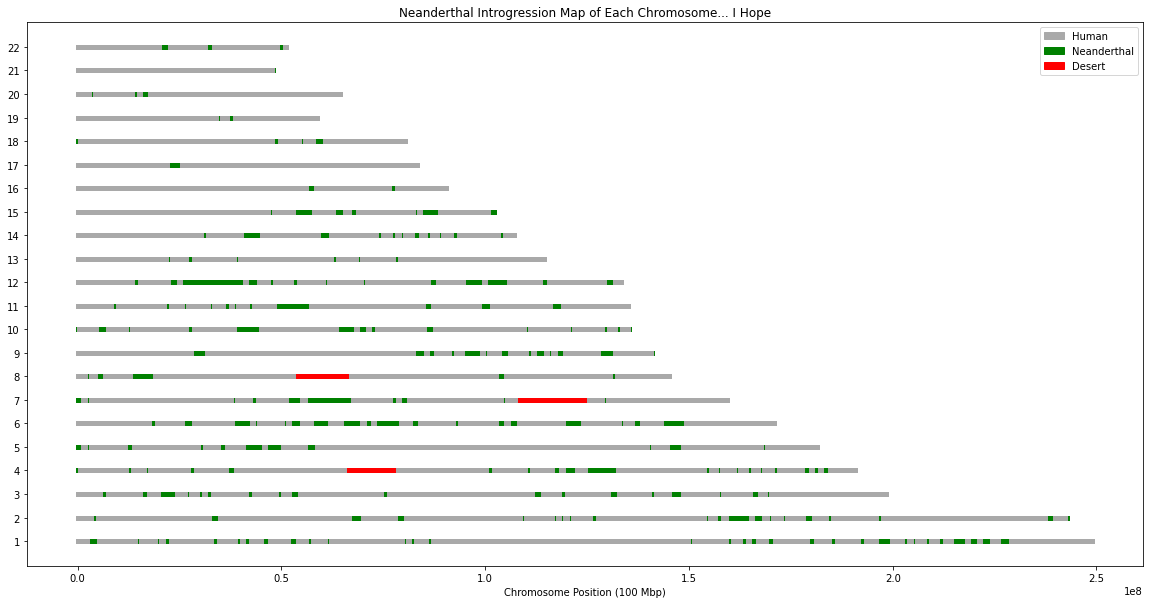

In [ ]:
total_map = pd.DataFrame()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

for chr in range(1, 23):
  chrmap = map_haplotypes(chr)
  for start, stop, color in zip(chrmap["start"].values, chrmap["stop"].values, chrmap["color"].values):
    ax.plot([start, stop], [chr, chr], color=color, lw=5)

plt.title("Neanderthal Introgression Map of Each Chromosome... I Hope")
ax.set_xlabel("Chromosome Position (100 Mbp)")
ax.set_yticks(range(1, 23))


red_patch = mpatches.Patch(color='red', label='Desert')
grey_patch = mpatches.Patch(color='darkgrey', label='Human')
green_patch = mpatches.Patch(color='green', label='Neanderthal')
plt.legend(handles=[grey_patch, green_patch, red_patch])

print(total_map)
plt.savefig("neanderthalstuffmaybe.png", dpi=600)

## Attempt 2 to infer deserts from probabilities

In [ ]:
chr_lengths = {}

for line in open("../../hg19.genome-lengths", "r"):
  chr, length = line.split("\t")
  chr_lengths[chr] = int(length)
print(chr_lengths)

genome_gaps = pd.read_table("../../telo_cent_hg19.txt", names=["chr", "start", "stop"], dtype={"chr": str, "start": int, "stop": int})
print(genome_gaps)

chrom_files = ["pred.{0}.thresh-50.length-0.00".format(x) for x in range(1, 23)]
print(chrom_files)

{'1': 249250621, '2': 243199373, '3': 198022430, '4': 191154276, '5': 180915260, '6': 171115067, '7': 159138663, '8': 146364022, '9': 141213431, '10': 135534747, '11': 135006516, '12': 133851895, '13': 115169878, '14': 107349540, '15': 102531392, '16': 90354753, '17': 81195210, '18': 78077248, '19': 59128983, '20': 63025520, '21': 48129895, '22': 51304566, 'X': 155270560, 'Y': 59373566}
   chr      start       stop
0    1          0      10000
1    1  121535434  124535434
2    1  249240621  249250621
3    2          0      10000
4    2  243189373  243199373
..  ..        ...        ...
65   X  155260560  155270560
66   X   58632012   61632012
67   Y          0      10000
68   Y   10104553   13104553
69   Y   59363566   59373566

[70 rows x 3 columns]
['pred.1.thresh-50.length-0.00', 'pred.2.thresh-50.length-0.00', 'pred.3.thresh-50.length-0.00', 'pred.4.thresh-50.length-0.00', 'pred.5.thresh-50.length-0.00', 'pred.6.thresh-50.length-0.00', 'pred.7.thresh-50.length-0.00', 'pred.8.thresh

In [ ]:
def get_ancestry(snp_file, window_size):
  snp_frame = pd.read_table(snp_file, usecols=[1, 3, 10], names=["chr", "pos", "prob"], skiprows=27, dtype={"chr": str, "pos": int, "prob": float}) # import SNP probabilities from files

  chr = snp_frame.loc[0, "chr"]

  chrom_length = chr_lengths[chr] # get chromosome length

  gaps = genome_gaps.loc[genome_gaps["chr"] == chr] # get windows to avoid

  winlist = []
  frac_anc = []

  for w_min in range(0, chrom_length, window_size):
    w_max = w_min + window_size

    for gstart, gstop in zip(gaps["start"], gaps["stop"]):
      if (w_min >= gstart and w_min <= gstop) or (w_max >= gstart and w_max <= gstop) or (w_min <= gstart and w_max >= gstop):
        winlist.append((w_min + w_max)/2)
        frac_anc.append(0)
      else:
        window_snps = snp_frame.loc[(snp_frame["pos"] >= w_min) & (snp_frame["pos"] < w_max)]
        nean_snps = window_snps.loc[(window_snps["prob"] >= 0.25)]
        snp_count = len(window_snps)
        nean_count = len(nean_snps)

        if snp_count >= 10:
          # print("Window: {0}, {1}\t Total SNPs: {2}\t Neanderthal SNPs: {3}\t Neanderthal Fraction: {4:0.4f}".format(w_min, w_max, snp_count, nean_count, nean_count/snp_count))
          winlist.append((w_min + w_max)/2)
          frac_anc.append(nean_count/snp_count)

  return winlist, frac_anc, chrom_length

In [ ]:
def plot_ancestry(chr, size, ax):
  windows, fracs, chrom_len = get_ancestry(chrom_files[chr-1], size)

  ax.plot(windows, fracs, label=str(size))

  gaps = genome_gaps.loc[genome_gaps["chr"] == str(chr)] # get windows to avoid
  for start, stop in zip(gaps["start"], gaps["stop"]):
    # print(start, stop)
    ax.plot([start, stop], [0, 0], lw=10, color="black")

  ax.set_xlim(-1000000, chrom_len+1000000)
  ax.set_ylim(0, 0.5)
  ax.legend()

  return fracs

In [ ]:
get_ancestry(chrom_files[0], 100000)

        chr        pos    prob
0         1     887471  0.0300
1         1     887486  0.0300
2         1     887537  0.0300
3         1     887560  0.0300
4         1     887651  0.0300
...      ..        ...     ...
2228467   1  249202067  0.0134
2228468   1  249202113  0.0134
2228469   1  249202172  0.0134
2228470   1  249202228  0.0134
2228471   1  249202234  0.0134

[2228472 rows x 3 columns]


KeyboardInterrupt: ignored

In [ ]:
fig, ax = plt.subplots(22, 1, figsize=(12, 48))
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 3))

for window in [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]:
  all_fracs = []
  for i in range(1, 23):
    all_fracs = all_fracs + plot_ancestry(i, window, ax[i-1])

  sns.displot(all_fracs, kde=True, ax=ax2)

## Attempt 3 to infer deserts from probabilities because inefficient

In [ ]:
chr_lengths = {}

for line in open("hg19.genome-lengths", "r"):
  chr, length = line.split("\t")
  chr_lengths[chr] = int(length)
print(chr_lengths)

genome_gaps = pd.read_table("gap.txt", names=["chr", "start", "stop"], usecols=[1, 2, 3], dtype={"chr": str, "start": int, "stop": int})
genome_gaps["chr"] = genome_gaps["chr"].str.replace('chr', '_').str.split('_').str[1]
print(genome_gaps)

chrom_files = ["denisova/oceania/summaries/pred.{0}.thresh-50.length-0.00".format(x) for x in range(1, 23)]
print(chrom_files)

{'1': 249250621, '2': 243199373, '3': 198022430, '4': 191154276, '5': 180915260, '6': 171115067, '7': 159138663, '8': 146364022, '9': 141213431, '10': 135534747, '11': 135006516, '12': 133851895, '13': 115169878, '14': 107349540, '15': 102531392, '16': 90354753, '17': 81195210, '18': 78077248, '19': 59128983, '20': 63025520, '21': 48129895, '22': 51304566, 'X': 155270560, 'Y': 59373566}
    chr     start      stop
0     1         0     10000
1     1    177417    227417
2     1    267719    317719
3     1    471368    521368
4     1   2634220   2684220
..   ..       ...       ...
452   Y  22369679  22419679
453   Y  23901428  23951428
454   Y  28819361  58819361
455   Y  58917656  58967656
456   Y  59363566  59373566

[457 rows x 3 columns]
['denisova/oceania/summaries/pred.1.thresh-50.length-0.00', 'denisova/oceania/summaries/pred.2.thresh-50.length-0.00', 'denisova/oceania/summaries/pred.3.thresh-50.length-0.00', 'denisova/oceania/summaries/pred.4.thresh-50.length-0.00', 'denisova/oce

In [ ]:
def get_regions(chr, size):
  gap_ranges = []
  chrom_length = chr_lengths[str(chr)] # get chromosome length
  gaps = genome_gaps.loc[genome_gaps["chr"] == str(chr)] # get windows to avoid

  for gstart, gstop in zip(gaps["start"], gaps["stop"]):
    gap_ranges.append(range(gstart, gstop))

  return gap_ranges, itertools.filterfalse(lambda x: x in itertools.chain(*gap_ranges), range(0, chrom_length, size))

def get_ancestry(snp_file):

  # start = time.time()
  snp_frame = pd.read_table(snp_file, usecols=[1, 3, 10], names=["chr", "pos", "prob"], skiprows=27, dtype={"chr": str, "pos": int, "prob": float}) # import SNP probabilities from files
  # print(1, time.time() - start)

  chr = snp_frame.iloc[0]["chr"]

  print("Calculating ancestry for chromosome {0}".format(chr))

  chrom_length = chr_lengths[chr] # get chromosome length

  # winlist = []
  # frac_anc = []

  with open("denisova/oceania/summaries/ancestry_files/window_anc_{0}.txt".format(chr), "a") as file:
    for size in [100000, 1000000, 10000000]:
      for w_min in get_regions(int(chr), size)[1]:
        w_max = w_min + size

        # start = time.time()
        window_snps = snp_frame[snp_frame["pos"].between(w_min, w_max)]
        # print(3, time.time() - start)

        # start = time.time()
        snp_count = len(window_snps)
        # print(4, time.time() - start)

        # start = time.time()
        nean_prop = window_snps["prob"].sum()
        # print(5, time.time() - start)

        # start = time.time()
        # print("Window: {0}, {1}\t Total SNPs: {2}\t Neanderthal SNPs: {3}\t Neanderthal Fraction: {4:0.4f}".format(w_min, w_max, snp_count, nean_count, nean_count/snp_count))
        # winlist.append((w_min, w_max))
        # frac_anc.append(nean_count/snp_count)
        # print(6, time.time() - start)
        file.write("{0}\t{1}\t{2}\t{3}\t{4}\n".format(size, w_min, w_max, nean_prop, snp_count))

    # return winlist, frac_anc, chrom_length


In [ ]:
# for i in range(1, 23):
#   get_ancestry(chrom_files[i-1])

Calculating ancestry for chromosome 1
Calculating ancestry for chromosome 2
Calculating ancestry for chromosome 3
Calculating ancestry for chromosome 4
Calculating ancestry for chromosome 5
Calculating ancestry for chromosome 6
Calculating ancestry for chromosome 7
Calculating ancestry for chromosome 8
Calculating ancestry for chromosome 9
Calculating ancestry for chromosome 10
Calculating ancestry for chromosome 11
Calculating ancestry for chromosome 12
Calculating ancestry for chromosome 13
Calculating ancestry for chromosome 14
Calculating ancestry for chromosome 15
Calculating ancestry for chromosome 16
Calculating ancestry for chromosome 17
Calculating ancestry for chromosome 18
Calculating ancestry for chromosome 19
Calculating ancestry for chromosome 20
Calculating ancestry for chromosome 21
Calculating ancestry for chromosome 22


In [ ]:
def plot_ancestry(chr, size, ax):
  xdata = []
  ydata = []

  ancestry_file = "denisova/oceania/summaries/ancestry_files/window_anc_" + str(chr) + ".txt"

  with open(ancestry_file, "r") as file:
    for line in file:
      win_size, wmin, wmax, neanavg, snpc = line.split("\t")
      if int(win_size) == size:
        try:
          neanavg = float(neanavg.strip()) / int(snpc.strip())
        except(ZeroDivisionError):
          neanavg = 0
        wmid = (int(wmin) + int(wmax))/2
        xdata.append(wmid)
        ydata.append(neanavg)

  bad_regions = get_regions(chr, size)[0]
  for ran in bad_regions:
    bad_sites = [x for x in ran]
    ran_start = min(bad_sites)
    ran_stop = max(bad_sites)
    ran_mid = (ran_start + ran_stop)/2
    bisect.insort(xdata, ran_mid)
    ydata.insert(xdata.index(ran_mid), 0)
    ax.plot([ran_start, ran_stop], [0, 0], color="red", lw=3)

  # print(ydata)
  ax.plot(xdata, ydata)

  telocent = pd.read_table("telo_cent_hg19.txt", names=["chr", "start", "stop"], dtype={"chr": str, "start": int, "stop": int})
  chr_telocent = telocent.loc[telocent["chr"] == str(chr)]
  # print(chr_telocent)

  for tcstart, tcstop in zip(chr_telocent["start"], chr_telocent["stop"]):
    ax.plot([tcstart, tcstop], [0, 0], color="black", lw=4)

  box_style=dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
  ax.text(0.025, 0.5, "Chr: " + str(chr), {'color':'black','weight':'heavy','size':20}, bbox=box_style, transform=ax.transAxes)

  ax.set_yticks([0, 0.1, 0.5])
  ax.set_ylim(-0.05, 0.3)


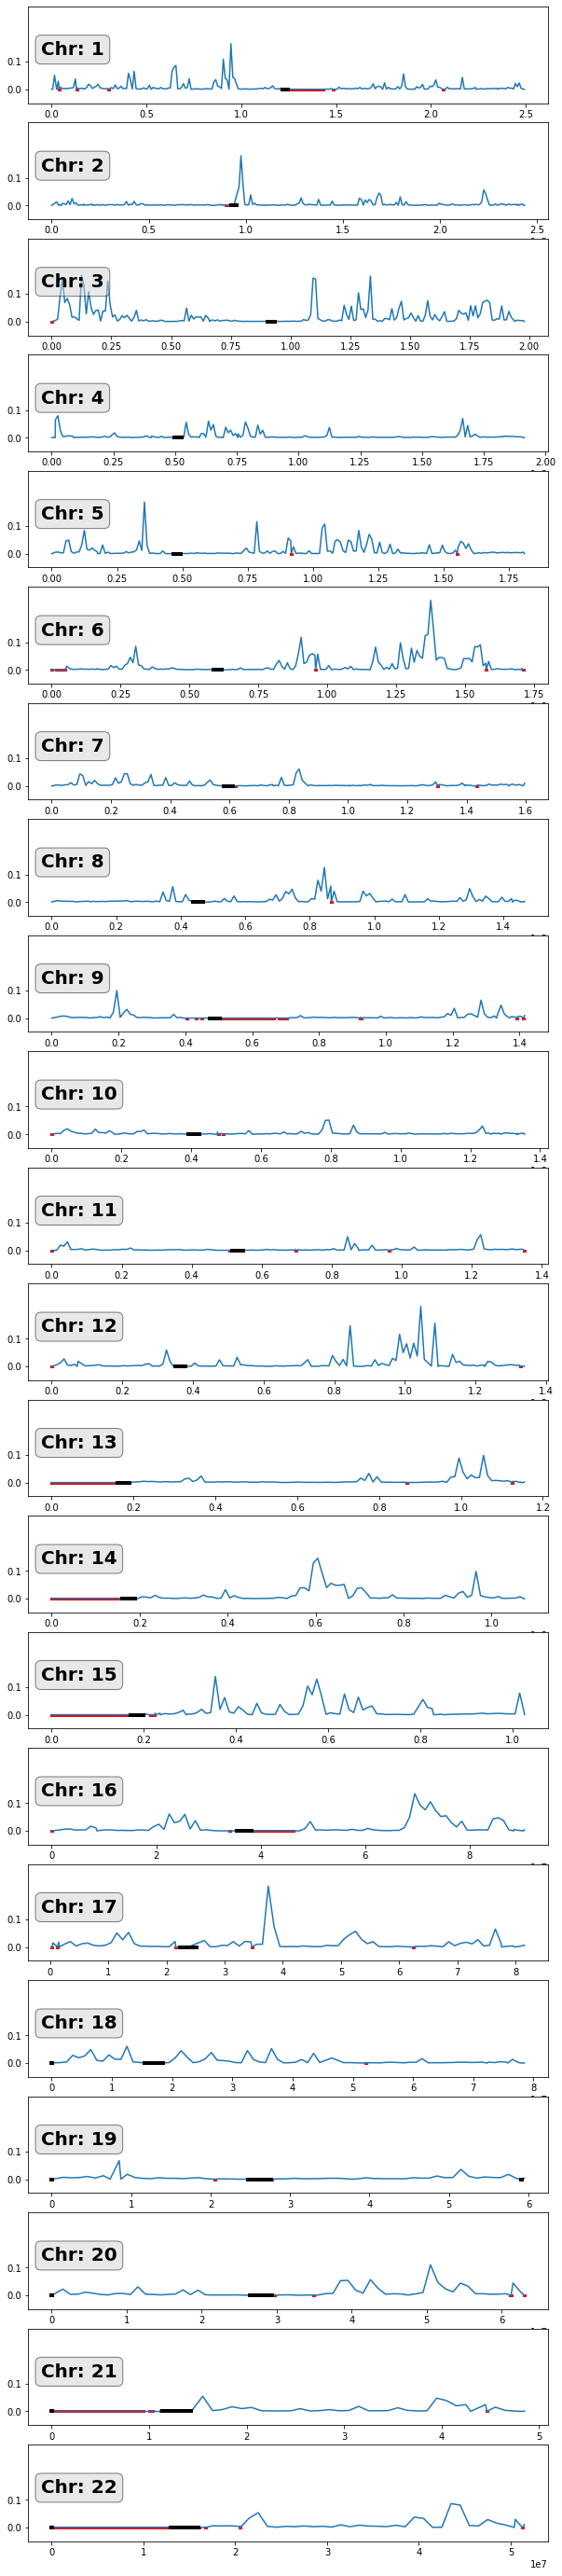

In [ ]:
fig, ax = plt.subplots(22, 1, figsize=(10,50))

for i in range(1, 23):
  plot_ancestry(i, 1000000, ax[i-1])

plt.savefig("chr_deni_ancestry_oceania_correct.png", dpi=600)

In [ ]:
def get_deserts(chr, size):
  ancestry_file = "denisova/oceania/summaries/ancestry_files/window_anc_" + str(chr) + ".txt"
  desert_file = "denisova/oceania/summaries/ancestry_files/window_deserts_" + str(chr) + ".txt"

  with open(ancestry_file, "r") as rfile:
    with open(desert_file, "w") as wfile:
      for line in rfile:
        win_size, wmin, wmax, fanc, snpc = line.split("\t")
        fanc = float(fanc.strip())
        wmid = (int(wmin) + int(wmax))/2
        if int(win_size) == size and int(snpc) >= 1000 and fanc < 0.01:
          wfile.write("{0}\t{1}\t{2}\t{3}\t{4}\n".format(size, wmin, wmax, fanc, snpc))

In [ ]:
for i in range(1, 23):
  get_deserts(i, 1000000)

## Analysis on Ancestry and B-statistic

In [ ]:
def find_correlation(chr, size):
  nean_file = "neandertal/eastasia/summaries/ancestry_files/window_anc_" + str(chr) + ".txt"
  deni_file = "denisova/oceania/summaries/ancestry_files/window_anc_" + str(chr) + ".txt"

  nean_frame = pd.read_table(nean_file, names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "neancoutn": int, "snpcount": int}) # import SNP probabilities from files
  deni_frame = pd.read_table(deni_file, names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "neancoutn": int, "snpcount": int}) # import SNP probabilities from files

  nean_frame = nean_frame.loc[nean_frame["size"] == size]
  deni_frame = deni_frame.loc[deni_frame["size"] == size]

  nean_frame["percentile"] = nean_frame["fracanc"].rank(pct=True)
  deni_frame["percentile"] = deni_frame["fracanc"].rank(pct=True)

  # nean_fracs = np.where(nean_frame["snpcount"] != 0, nean_frame["fracanc"]/nean_frame["snpcount"], 0)
  # deni_fracs = np.where(deni_frame["snpcount"] != 0, deni_frame["fracanc"]/deni_frame["snpcount"], 0)

  # change percentile to fracanc for chi2 test
  return nean_frame["percentile"].to_list(), deni_frame["percentile"].to_list()



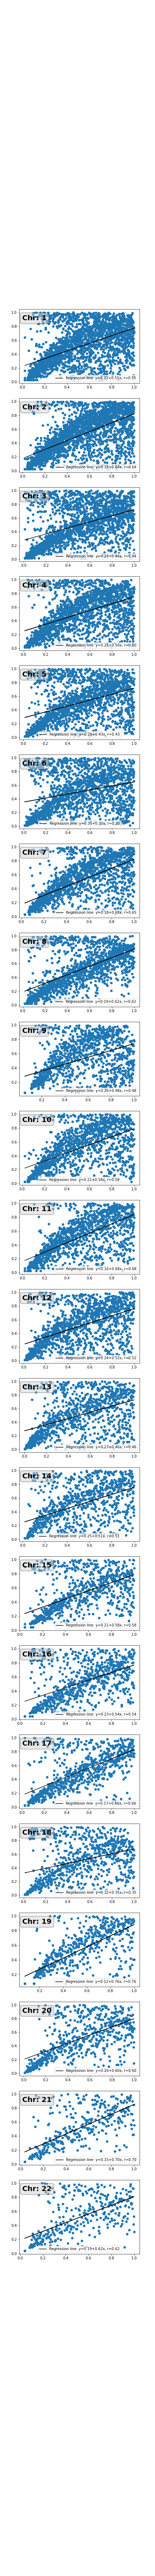

In [ ]:
fig, ax = plt.subplots(22, 1, figsize=(6,100))

for i in range(1, 23):

  nean_perc, deni_perc = find_correlation(i, 100000)
  slope, intercept, r, p, stderr = scipy.stats.linregress(nean_perc, deni_perc)
  line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
  ax[i-1].plot(nean_perc, intercept + slope * np.array(nean_perc), label=line, color="black")
  box_style=dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
  ax[i-1].text(0.025, 0.85, "Chr: " + str(i), {'color':'black','weight':'heavy','size':20}, bbox=box_style, transform=ax[i-1].transAxes)
  ax[i-1].scatter(nean_perc, deni_perc)

  ax[i-1].legend()

plt.savefig("neanvsdeni_anc_correlation.png", dpi=600)


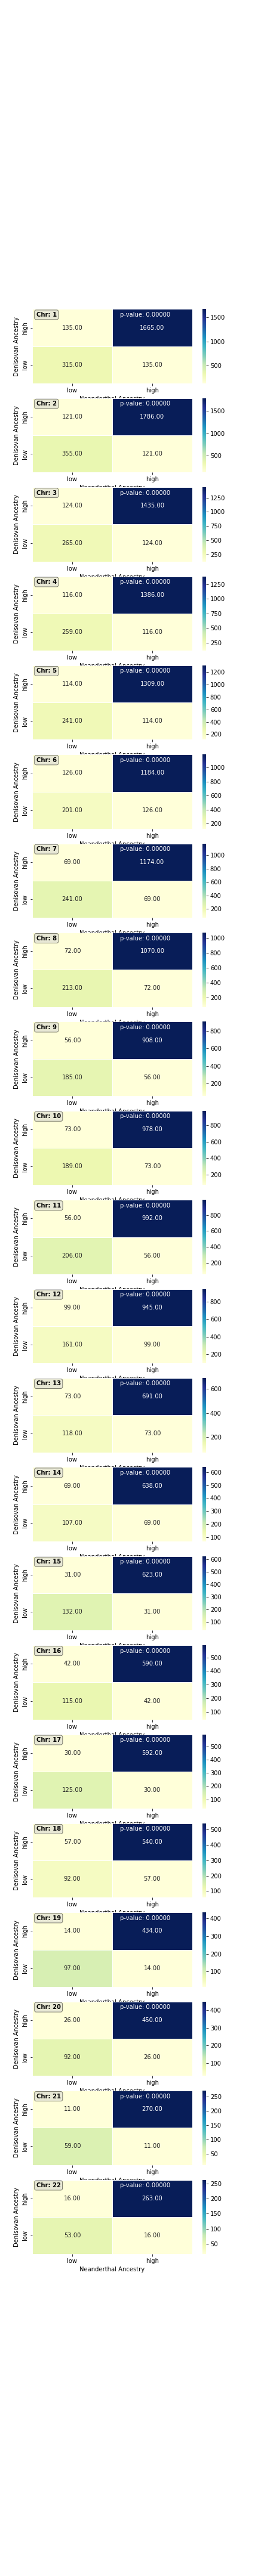

In [ ]:
fig, ax = plt.subplots(22, 1, figsize=(6,60))

for i in range(1, 23):

  nean_perc, deni_perc = find_correlation(i, 100000)
  nean_deni_20 = sum((k <= 0.2 and j <= 0.2) for k, j in zip(nean_perc, deni_perc))
  nean_20_deni_100 = sum((k <= 0.2 and j > 0.2) for k, j in zip(nean_perc, deni_perc))
  nean_100_deni_20 = sum((k > 0.2 and j <= 0.2) for k, j in zip(nean_perc, deni_perc))
  nean_deni_100 = sum((k > 0.2 and j > 0.2) for k, j in zip(nean_perc, deni_perc))

  anc_contingency = [[nean_20_deni_100, nean_deni_100], [nean_deni_20, nean_100_deni_20]]

  chi2, p, dof, expec = scipy.stats.chi2_contingency(anc_contingency)

  # print(anc_contingency)

  # print(chi2, p)

  ticklabels = ["low", "high"]

  line = f'p-value: {p:.5f}'

  res = sns.heatmap(anc_contingency, annot=True, fmt='.2f', cmap="YlGnBu", linewidths=.5, xticklabels=ticklabels, yticklabels=ticklabels[::-1], ax=ax[i-1])

  box_style=dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
  ax[i-1].text(0.025, 0.9, "Chr: " + str(i), {'color':'black','weight':'heavy','size':10}, bbox=box_style, transform=ax[i-1].transAxes)
  ax[i-1].text(0.55, 0.9, line, {'color':'white','weight':'light','size':10}, transform=ax[i-1].transAxes)
  ax[i-1].set_xlabel("Neanderthal Ancestry")
  ax[i-1].set_ylabel("Denisovan Ancestry")

plt.savefig("neanvsdeni_anc_chisquare.png", dpi=300)

In [ ]:
def get_overlaps(set1, set2):
  num_overlaps = 0
  for i in range(len(set1)):
    start1 = set1.loc[i, "wmin"]
    stop1 = set1.loc[i, "wmax"]
    for j in range(len(set2)):
      start2 = set2.loc[j, "wmin"]
      stop2 = set2.loc[j, "wmax"]
      intersection = min(stop1,stop2) - max(start1,start2)

      if intersection > 0:
        num_overlaps += 1

  return num_overlaps

In [ ]:
def plot_overlaps(chr):
  nean_frame = pd.read_table("neandertal/eastasia/summaries/ancestry_files/window_anc_{0}.txt".format(str(chr)), names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "neancoutn": int, "snpcount": int}) # import SNP probabilities from files
  deni_frame = pd.read_table("denisova/oceania/summaries/ancestry_files/window_anc_{0}.txt".format(str(chr)), names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "neancoutn": int, "snpcount": int}) # import SNP probabilities from files
  nean_frame = nean_frame.loc[nean_frame["snpcount"] >= 1000].reset_index()
  deni_frame = deni_frame.loc[deni_frame["snpcount"] >= 1000].reset_index()

  nean_frame["perc"] = nean_frame["fracanc"].rank(pct=True)
  deni_frame["perc"] = deni_frame["fracanc"].rank(pct=True)


  nean_deserts = nean_frame.loc[nean_frame["perc"] < 0.1].reset_index()
  deni_deserts = deni_frame.loc[deni_frame["perc"] < 0.1].reset_index()

  print(len(nean_deserts), len(deni_deserts))

  actual_overlaps = get_overlaps(nean_deserts, deni_deserts)
  random_overlaps = []

  for j in range(0, 200):
    random_frame = nean_frame.sample(n=len(nean_deserts), ignore_index=True)
    random_overlaps.append(get_overlaps(deni_deserts, random_frame))

  ax[i-1].hist(random_overlaps)

  ax[i-1].set_xlim(50, 200)

  ax[i-1].axvline(x=actual_overlaps, color="red", label="denisovan desert overlap")

  ax[i-1].axvline(x=np.mean(random_overlaps), color="black", label="random region overlap")

  ax[i-1].legend()

  ax[i-1].set_xlabel("Number of Overlapping Regions")
  ax[i-1].set_ylabel("Frequency")
  ax[i-1].set_xlim(20, 300)

156 156
184 184
166 166
164 164
147 147
139 139
115 115
122 122
92 92
105 105
102 102
94 94
84 84
72 72
62 62
58 58
47 47
69 69
21 21
48 48
31 31
22 22


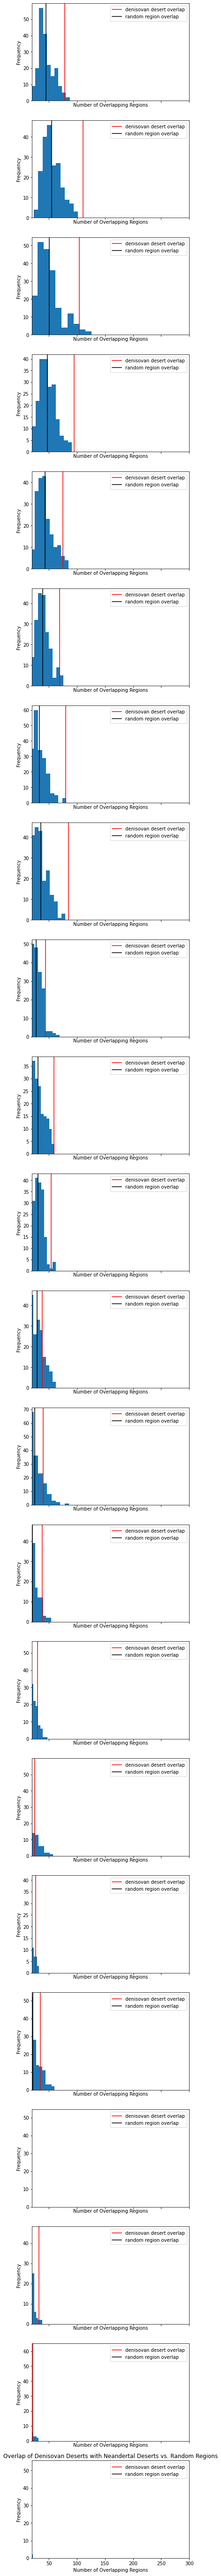

In [ ]:
fig, ax = plt.subplots(22, 1, figsize=(6, 100), sharex=True)

for i in range(1, 23):
  plot_overlaps(i)

plt.title("Overlap of Denisovan Deserts with Neandertal Deserts vs. Random Regions")

plt.savefig("deni_random_v_neandesert_.001.png", dpi=600)

In [ ]:
bstats = pd.read_table("bstats/bkgd_hg19.bed.gz", names=["chr", "start", "stop", "trash", "bstat"], usecols=["chr", "start", "stop", "bstat"], sep="\t", dtype={"chr": str, "start": int, "stop": int, "bstat": float})
bstats["chr"] = bstats["chr"].str[3:]
bstats.loc[bstats["chr"]=="X", "chr"] = 0 # replace chr X with 0 to avoid type casting errors
bstats["length"] = bstats.apply(lambda row: row["stop"] - row["start"], axis=1)
print(bstats)

        chr      start       stop  bstat  length
0         1     651930     741567  0.982   89637
1         1     741567     790028  0.976   48461
2         1     790028     820796  0.970   30768
3         1     820796     842130  0.964   21334
4         1     842130     856056  0.958   13926
...      ..        ...        ...    ...     ...
4376877   0  155159204  155190286  0.512   31082
4376878   0  155190286  155221572  0.519   31286
4376879   0  155221572  155238851  0.526   17279
4376880   0  155238851  155250813  0.533   11962
4376881   0  155250813  155260560  0.541    9747

[4376882 rows x 5 columns]


In [ ]:
def window_stats(chr, row):
  window_b = bstats.loc[(bstats["chr"].astype(int) == chr) & (bstats["start"].between(row["wmin"], row["wmax"])) & (bstats["stop"].between(row["wmin"], row["wmax"]))]
  # print(window_b.to_string())
  length = window_b["length"].sum()
  # print(window_b["length"].sum())
  avgb = 0
  try:
    window_b["weighted"] = window_b.apply(lambda x: x["bstat"]*x["length"] / length, axis=1)
    avgb = window_b["weighted"].sum()
  except(ValueError):
    avgb = np.nan

  # calculate avg recombination rate for window
  rec_frame = pd.read_table("rec_rates/genetic_map_GRCh37_chr{0}.txt".format(str(chr)), header=0, names=["chr", "pos", "rate", "map"], dtype={"chr": str, "pos": int, "rate": float, "map": float})
  window_rec = rec_frame.loc[rec_frame["pos"].between(row["wmin"], row["wmax"])]
  # print(window_rec)
  window_rec["rate"].interpolate(inplace=True)
  # print(window_rec["rec.rate"].isnull().values.any())
  length = len(window_rec)
  try:
    avg_recrate = window_rec["rate"].sum() / length
  except(ValueError):
    avg_recrate = np.nan

  return avgb, avg_recrate



for chr in range(1, 23):
  print("chr: ", chr)
  nean_frame = pd.read_table("neandertal/eastasia/summaries/ancestry_files/window_anc_{0}.txt".format(str(chr)), names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "snpcount": int}) # import SNP probabilities from files
  #print(len(nean_frame))

  nean_frame[["avg_b", "avg_rec"]] = nean_frame.apply(lambda row: window_stats(chr, row), result_type='expand', axis=1)

  nean_frame.to_csv("neandertal/eastasia/summaries/stats/window_stats_{0}.txt".format(str(chr)), sep="\t")


chr:  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


chr:  2
chr:  3
chr:  4
chr:  5
chr:  6
chr:  7
chr:  8
chr:  9
chr:  10
chr:  11
chr:  12
chr:  13
chr:  14
chr:  15
chr:  16
chr:  17
chr:  18
chr:  19
chr:  20
chr:  21
chr:  22


In [ ]:
df_list = []

for chr in range(1, 23):
  nean_frame = pd.read_table("neandertal/eastasia/summaries/ancestry_files/window_anc_{0}.txt".format(str(chr)), header=0, names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "snpcount": int}) # import SNP probabilities from files
  nean_frame["chr"] = chr
  deni_frame = pd.read_table("denisova/oceania/summaries/ancestry_files/window_anc_{0}.txt".format(str(chr)), names=["size", "wmin", "wmax", "fracanc", "snpcount"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "snpcount": int}) # import SNP probabilities from files
  stat_frame = pd.read_table("neandertal/eastasia/summaries/stats/window_stats_{0}.txt".format(str(chr)), header=0,names=["size", "wmin", "wmax", "fracanc", "snpcount","avg_b", "avg_rec"], dtype={"size": int, "wmin": int, "wmax": int, "fracanc": float, "snpcount": int, "avg_b": float, "avg_rec": float})

  # nean_frame = nean_frame.loc[nean_frame["size"] == 1000000]
  nean_frame["deni_anc"] = deni_frame.apply(lambda row: row["fracanc"] / row["snpcount"] if row["snpcount"] > 0 else 0, axis=1)
  nean_frame["avg_b"] = stat_frame["avg_b"]
  nean_frame["avg_rec"] = stat_frame["avg_rec"]
  df_list.append(nean_frame)

all_chroms = pd.concat(df_list)
all_chroms["anc"] = all_chroms.apply(lambda row: row["fracanc"] / row["snpcount"] if row["snpcount"] > 0 else 0, axis=1)


print(all_chroms)

         size      wmin      wmax    fracanc  snpcount  chr  deni_anc  \
0      100000    400000    500000     0.0000         0    1  0.000000   
1      100000    600000    700000     0.0000         0    1  0.000000   
2      100000    700000    800000     0.0000         0    1  0.000000   
3      100000    800000    900000     2.4239        81    1  0.000000   
4      100000    900000   1000000     7.6950       276    1  0.016594   
..        ...       ...       ...        ...       ...  ...       ...   
381   1000000  51000000  52000000    31.0752      1314   22  0.029236   
382  10000000  20000000  30000000  4981.3532     79456   22  0.010354   
383  10000000  30000000  40000000  1373.8028    101073   22  0.008878   
384  10000000  40000000  50000000  2987.3443    116862   22  0.008079   
385  10000000  50000000  60000000   543.6355     11124   22  0.027795   

        avg_b   avg_rec       anc  
0         NaN       NaN  0.000000  
1         NaN       NaN  0.000000  
2         NaN  

Text(0.5, 1.0, 'Ancestry Increases with B-statistic')

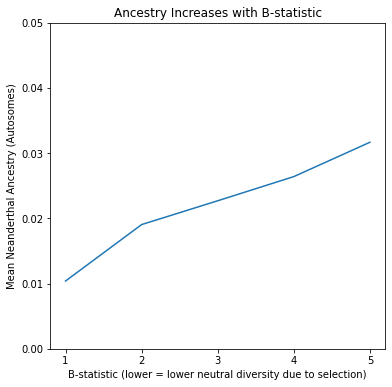

In [ ]:
all_chroms.dropna(inplace=True)

bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(all_chroms["avg_b"],
                all_chroms["anc"], statistic='mean', bins=5)

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True)

ax.plot(range(1, 6), bin_means)
ax.set_xticks(range(1, 6))
ax.set_yticks(np.linspace(0, 0.05, 6))
ax.set_xlabel("B-statistic (lower = lower neutral diversity due to selection)")
ax.set_ylabel("Mean Neanderthal Ancestry (Autosomes)")
ax.set_title("Ancestry Increases with B-statistic")

244


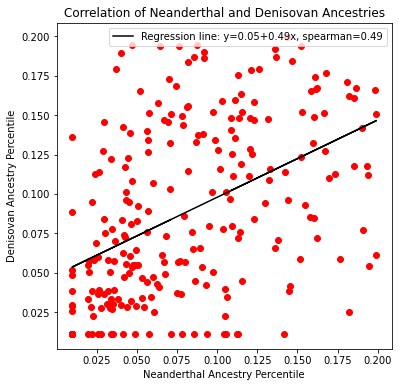

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

features = all_chroms.copy()
features["perc"] = features["anc"].rank(pct=True)
features["deni_perc"] = features["deni_anc"].rank(pct=True)
deserts = features.loc[(features["chr"] == 3) & (features["perc"] <= 0.2) & (features["deni_perc"] <= 0.2)]

nean20 = deserts["perc"].to_list()
deni20 = deserts["deni_perc"].to_list()
bstat = deserts["avg_b"].to_list()

# deni20 = np.log(deni20)
# nean20 = np.log(nean20)

print(len(nean20))

spr, pval = scipy.stats.spearmanr(nean20, deni20)
slope, intercept, r, p, stderr = scipy.stats.linregress(nean20, deni20)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, spearman={spr:.2f}'
ax.plot(nean20, intercept + slope * np.array(nean20), label=line, color="black")
box_style=dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
ax.scatter(nean20, deni20, color="red")

ax.set_xlabel("Neanderthal Ancestry Percentile")
ax.set_ylabel("Denisovan Ancestry Percentile")
ax.set_title("Correlation of Neanderthal and Denisovan Ancestries")

ax.legend()

plt.savefig("neanvsdeni_anc_correlation_allchroms.png", dpi=600)

In [ ]:
from os import statvfs
from sklearn.linear_model import LinearRegression
import pingouin as pg

def plot_residuals():
  features = all_chroms.copy()
  features = features.loc[features["size"] == 10000000]
  features["nean_perc"] = features["anc"].rank(pct=True)
  features["deni_perc"] = features["deni_anc"].rank(pct=True)
  features["b_perc"] = features["avg_b"].rank(pct=True)
  features["r_perc"] = features["avg_rec"].rank(pct=True)

  features.dropna(inplace=True)
  stats = pg.partial_corr(data=features, x="nean_perc", y="deni_perc", covar="avg_b", method="spearman")
  print("partial correlation\n", stats)

  fig = plt.figure(figsize=(18, 12))
  ax1 = fig.add_subplot(331)
  ax4 = fig.add_subplot(334)
  ax2 = fig.add_subplot(332)
  ax5 = fig.add_subplot(335)
  ax6 = fig.add_subplot(336)
  ax3 = fig.add_subplot(333)
  ax7 = fig.add_subplot(414)

  # FIRST ROW PLOTS: neanderthal on B; denisovan on B; denisovan vs. neanderthal
  X = np.array(features["b_perc"].to_list()).reshape(-1, 1)
  y = np.array(features["nean_perc"].to_list()).reshape(-1, 1)
  model = LinearRegression()
  model.fit(X, y)
  y_pred = np.exp(model.predict(X))
  nresiduals = y_pred - y
  # print(str(model.intercept_[0]), model.coef_[0][0])
  line = f'Regression line: y={model.intercept_[0]:.2f}+{model.coef_[0][0]:.2f}x'

  ax1.scatter(X, y)
  ax1.plot(X, model.intercept_ + model.coef_ * X, label=line, color="black")
  ax1.legend()
  ax1.set_title("Regression of Neanderthal Ancestry on B-Statistic")

  X = np.array(features["b_perc"].to_list()).reshape(-1, 1)
  y = np.array(features["deni_perc"].to_list()).reshape(-1, 1)
  model = LinearRegression()
  model.fit(X, y)
  y_pred = np.exp(model.predict(X))
  dresiduals = y_pred - y

  ax3.scatter(X, y, color="tab:red")
  ax3.plot(X, model.intercept_ + model.coef_ * X, label=line, color="black")
  ax3.legend(loc="upper left")
  ax3.set_title("Regression of Denisovan Ancestry on B-Statistic")

  ax6.scatter(features["nean_perc"], features["deni_perc"], color="tab:purple")
  X = np.array(features["nean_perc"]).reshape(-1, 1)
  y = np.array(features["deni_perc"]).reshape(-1, 1)
  model = LinearRegression()
  model.fit(X, y)
  y_pred = np.exp(model.predict(X))
  bothresiduals = y_pred - y
  # print(str(model.intercept_[0]), model.coef_[0][0])
  line = f'Regression line: y={model.intercept_[0]:.2f}+{model.coef_[0][0]:.2f}x'
  ax6.plot(X, model.intercept_ + model.coef_ * X, label=line, color="black")
  ax6.legend()
  ax6.set_title("Denisovan vs. Neanderthal Ancestry")

  # SECOND ROW PLOTS: neanderthal on B residuals; denisovan on B residuals; denisovan vs. neanderthal residuals
  ax2.scatter(X, nresiduals, color="tab:green")
  ax2.set_title("Residuals Plotted Against B-Statistic")

  ax4.scatter(X, dresiduals, color="tab:red")
  ax4.set_title("Residuals Plotted Against B-Statistic")

  X = np.array(nresiduals).reshape(-1, 1)
  y = np.array(dresiduals).reshape(-1, 1)
  model = LinearRegression()
  model.fit(X, y)
  y_pred = np.exp(model.predict(X))
  rresiduals = y_pred - y
  # print(str(model.intercept_[0]), model.coef_[0][0])
  line = f'Regression line: y={model.intercept_[0]:.2f}+{model.coef_[0][0]:.2f}x'

  ax5.scatter(nresiduals, dresiduals, color="tab:purple")
  ax5.plot(X, model.intercept_ + model.coef_ * X, label=line, color="black")
  ax5.legend()
  ax5.set_title("Denisovan vs. Neanderthal Residuals")

  print("residual correlation\n", pg.corr(x=nresiduals.flatten(), y=dresiduals.flatten(), method="spearman"))

  # FOURTH ROW PLOTS
  perc_means, perc_edges, percbin = scipy.stats.binned_statistic(features["wmin"],
                  features["nean_perc"], statistic='mean', bins=20)

  b_means, b_edges, bbin = scipy.stats.binned_statistic(features["wmin"],
                  features["b_perc"], statistic='mean', bins=20)

  d_means, d_edges, dbin = scipy.stats.binned_statistic(features["wmin"],
                  features["deni_perc"], statistic='mean', bins=20)

  r_means, r_edges, rbin = scipy.stats.binned_statistic(features["wmin"],
                  features["r_perc"], statistic='mean', bins=20)

  ax7.plot(range(1, 21), perc_means, color="tab:green", label="Neanderthal")
  ax7.set_title("Neanderthal Ancestry Percentile vs. B-Statistic")
  ax7.plot(range(1, 21), d_means, color="tab:cyan", label="Denisovan")
  ax7.set_ylabel("Ancestry Percentile / B-Statistic")
  ax7.plot(range(1, 21), b_means, color="tab:orange", label="B-Statistic")
  axtwin = ax7.twinx()
  axtwin.plot(range(1, 21), r_means, color="tab:red", label="Recombination Rate")
  axtwin.set_ylabel("Recombination Rate")
  ax7.set_xticks(range(1, 21))
  ax7.legend(loc="upper right")
  axtwin.legend(loc="upper left")

  stats = pg.partial_corr(data=features, x="nean_perc", y="deni_perc", covar=["b_perc", "r_perc"], method="spearman")
  print("b and r covar\n", stats)

ModuleNotFoundError: ignored

partial correlation
             n       r         CI95%     p-val
spearman  259  0.0842  [-0.04, 0.2]  0.177566
residual correlation
             n         r         CI95%     p-val     power
spearman  259  0.082143  [-0.04, 0.2]  0.187569  0.261383
b and r covar
             n         r          CI95%     p-val
spearman  259  0.061425  [-0.06, 0.18]  0.326667


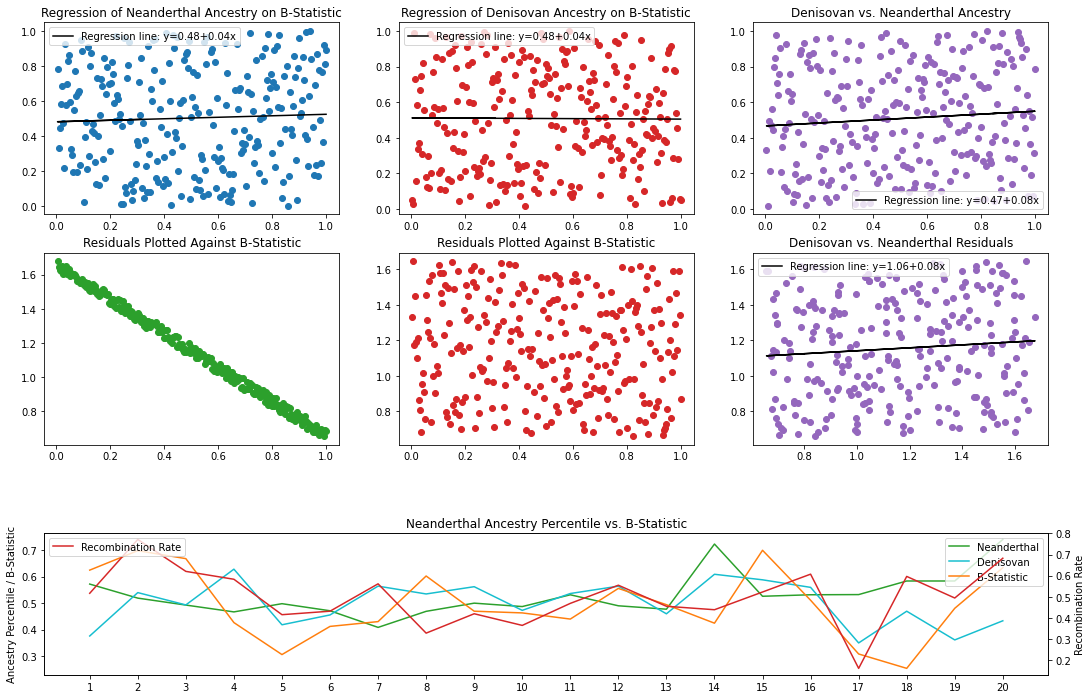

In [ ]:
plot_residuals()

## Not using but useful


321
-0.08951857533864473
321


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


-0.039445361730626974


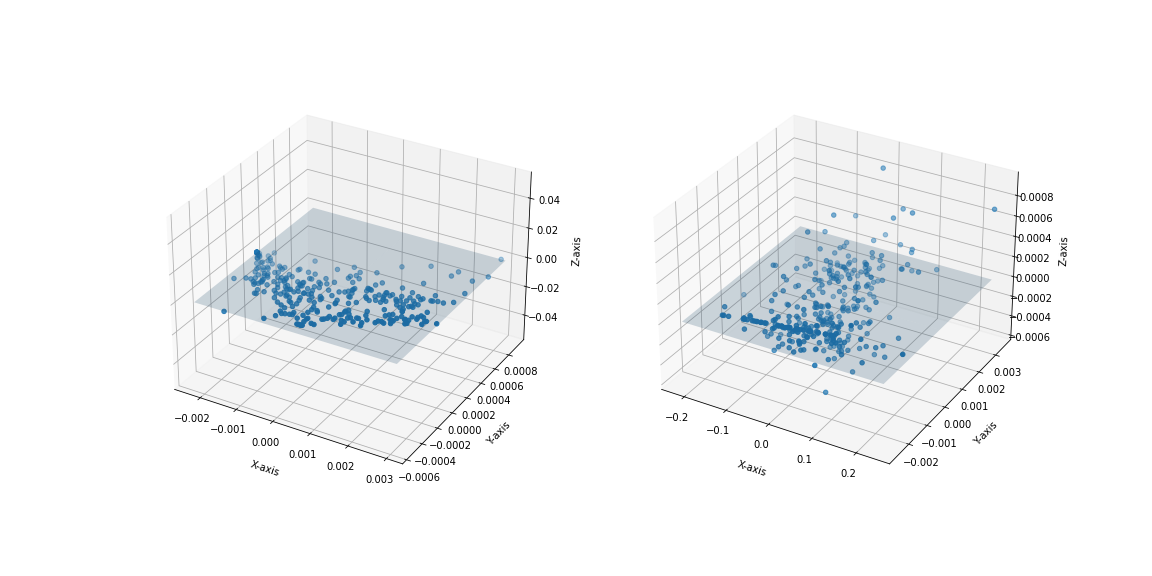

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Create a PCA instance: model
model = PCA()

# Features from dataframe
features = all_chroms.copy()
features["perc"] = features["anc"].rank(pct=True)
features["deni_perc"] = features["deni_anc"].rank(pct=True)
deserts = features.loc[(features["perc"] <= 0.2) & (features["deni_perc"] <= 0.2)]
subset = deserts[["anc", "deni_anc"]]

print(len(subset))
subset.dropna(inplace=True)
# print(features.to_string())

# Normalize features
normed_features = subset - subset.mean()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(normed_features)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# zs = pca_features[:, 2]

# Scatter plot xs vs ys
ax.scatter(xs, ys)
yy, xx = np.meshgrid(np.linspace(min(ys), max(ys), 3), np.linspace(min(xs), max(xs), 3))
zz = yy*0
ax.plot_surface(xx, yy, zz, alpha=0.2)

ax.set_xlabel("X-axis", labelpad=10)
ax.set_ylabel("Y-axis", labelpad=10)
ax.set_zlabel("Z-axis", labelpad=10)

# Calculate the Pearson correlation of xs and ys
spr, pval = scipy.stats.spearmanr(xs, ys)

# Display the correlation
print(spr)

# WITH B STAT FEATURE / 3RD AXIS
ax = fig.add_subplot(1, 2, 2, projection='3d')

subset = deserts[["anc", "deni_anc", "bstat"]]

print(len(subset))
subset.dropna(inplace=True)
# print(features.to_string())

# Normalize features
normed_features = subset - subset.mean()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(normed_features)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

zs = pca_features[:, 2]

# Scatter plot xs vs ys
yy, xx = np.meshgrid(np.linspace(min(ys), max(ys), 3), np.linspace(min(xs), max(xs), 3))
zz = yy*0
ax.plot_surface(xx, yy, zz, alpha=0.2)

ax.scatter(xs, ys, zs)
ax.set_xlabel("X-axis", labelpad=10)
ax.set_ylabel("Y-axis", labelpad=10)
ax.set_zlabel("Z-axis", labelpad=10)

# Calculate the Pearson correlation of xs and ys
spr, pval = scipy.stats.spearmanr(xs, ys)

# Display the correlation
print(spr)

plt.show()

R^2 0.48545643130792127


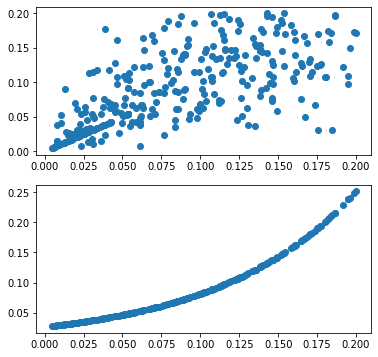

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.array(nean20).reshape(-1, 1)
y = np.array(np.log(deni20)).reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
y_pred = np.exp(model.predict(X))
print('R^2', model.score(X, y))

fig, ax = plt.subplots(2, 1, figsize=(6,6))
ax[0].scatter(X, np.exp(y))
ax[1].scatter(X, y_pred)

In [ ]:
from numba import jit

@jit(nopython=True)
def runtopos(run):
    start = np.empty(run.shape)
    stop = np.empty(run.shape)
    start[0] = 0
    stop[0] = run[0]
    for i in range(1, run.shape[0]):
        start[i] = stop[i-1] + 1
        stop[i] = start[i] + run[i]
    return start, stop

def bstat_bed(chr):
  bframe = pd.read_table("bstat/chr{0}.bkgd".format(str(chr)), names=["bstat", "run"], dtype={"bstat": int, "run": int}, sep=" ") # import SNP probabilities from files
  start, stop = runtopos(bframe['run'].values.T)

  bedframe = pd.DataFrame()

  bedframe["chr"] = [chr]*len(bframe)
  bedframe["start"] = start.astype(int)
  bedframe["stop"] = stop.astype(int)
  # bedframe["bstat"] = bframe["bstat"]

  return bedframe

bgs_frame = pd.DataFrame()
bgs_list = []
for i in range(1, 23):
  print(i)
  bgs_list.append(bstat_bed(i))

bgs_frame = pd.concat(bgs_list, ignore_index=True)

bgs_frame.to_csv("bstat/bstatistic_all.bed", index=False, sep="\t", header=None)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
test = pd.read_table('neander.chr-all.bstat1', sep="\t")